In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/AAPL.csv", parse_dates=["Date"])
df.dropna(inplace=True)
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.2885799407959,24.75733433246641,23.848705532925308,24.746225733732643,212818400
1,2015-01-05,23.604337692260742,24.137518365002265,23.41772538901526,24.057541179344305,257142000
2,2015-01-06,23.606555938720703,23.866480902659614,23.244436602442416,23.66876002975555,263188400
3,2015-01-07,23.93756675720215,24.037537355708736,23.70429976744142,23.815378963530524,160423600
4,2015-01-08,24.857309341430664,24.915071014189344,24.148623329110514,24.2663687337548,237458000
...,...,...,...,...,...,...
2510,2024-12-23,254.6557159423828,255.03479114956258,252.8400883307868,254.15691915529422,40858800
2511,2024-12-24,257.57867431640625,257.58862955018265,254.67565812568793,254.87518901917565,23234700
2512,2024-12-26,258.39666748046875,259.47408555117545,257.0100282923795,257.56867823862046,27237100
2513,2024-12-27,254.9749298095703,258.0774615569102,252.4510193654514,257.20952960207876,42355300


Preprocessing the data

In [2]:
# 1. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 2. Convert Date column to datetime
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 3. Convert all other columns to numeric (safely)
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Drop rows where Date or Close is missing
df.dropna(subset=["Date", "Close"], inplace=True)

# 5. Sort and reset index
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
df

,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
1,2015-01-05,23.604338,24.137518,23.417725,24.057541,257142000
2,2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
3,2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
4,2015-01-08,24.857309,24.915071,24.148623,24.266369,237458000
...,...,...,...,...,...,...
2510,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2511,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2512,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2513,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300


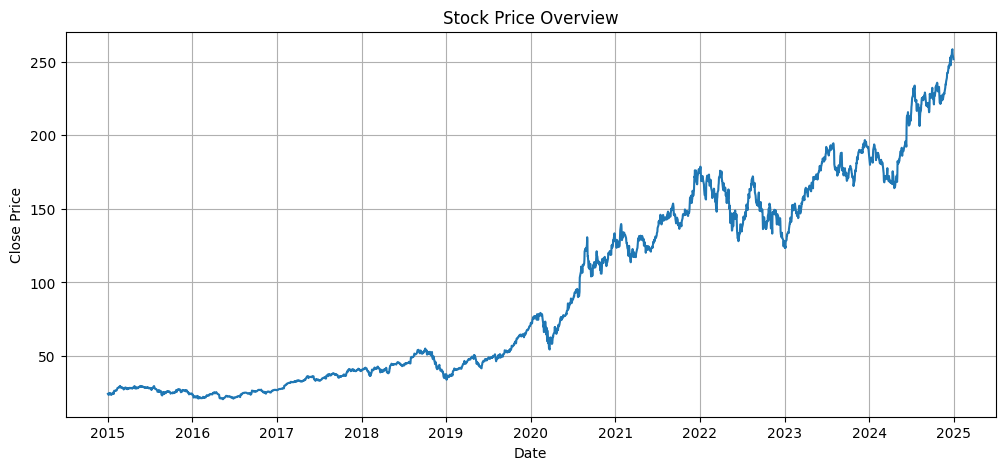

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"])
plt.title("Stock Price Overview")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

In [4]:
import pandas_ta as ta

# 14 period RSI
df["RSI"] = ta.rsi(df["Close"], length=14)

short_window = 20
long_window = 50

# Calculate Moving Averages
df["SMA_Short"] = df["Close"].rolling(window=short_window).mean()
df["SMA_Long"] = df["Close"].rolling(window=long_window).mean()

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
# df = df[["Date", "Close", "SMA_10", "SMA_50", "RSI"]]
df

,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long
0,2015-03-16,27.868248,27.868248,27.404336,27.629600,143497200,51.177457,28.484050,26.642976
1,2015-03-17,28.334389,28.396838,28.024370,28.080129,204092400,56.042621,28.475240,26.723892
2,2015-03-18,28.653332,28.807227,28.184958,28.325470,261083600,59.049507,28.472452,26.824872
3,2015-03-19,28.436989,28.827300,28.414686,28.715783,183238000,56.239294,28.461858,26.921480
4,2015-03-20,28.080133,28.637720,27.915088,28.604266,274780400,51.855482,28.421711,27.004332
...,...,...,...,...,...,...,...,...,...
2461,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,73.085639,244.437349,234.713737
2462,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,75.750273,245.700803,235.255514
2463,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,76.452865,246.895920,235.762830
2464,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,67.626263,247.926434,236.242966


In [5]:
df["signal"] = 0

# Generate Signals
df["signal"] = 0  # Default to Hold
df["signal"] = np.where(df["SMA_Short"] > df["SMA_Long"], 1, 0)   # Buy Signal
df["signal"] = np.where(df["SMA_Short"] < df["SMA_Long"], -1, df["signal"])  # Sell Signal
df[df["signal"] == 1]


,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long,signal
0,2015-03-16,27.868248,27.868248,27.404336,27.629600,143497200,51.177457,28.484050,26.642976,1
1,2015-03-17,28.334389,28.396838,28.024370,28.080129,204092400,56.042621,28.475240,26.723892,1
2,2015-03-18,28.653332,28.807227,28.184958,28.325470,261083600,59.049507,28.472452,26.824872,1
3,2015-03-19,28.436989,28.827300,28.414686,28.715783,183238000,56.239294,28.461858,26.921480,1
4,2015-03-20,28.080133,28.637720,27.915088,28.604266,274780400,51.855482,28.421711,27.004332,1
...,...,...,...,...,...,...,...,...,...,...
2461,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,73.085639,244.437349,234.713737,1
2462,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,75.750273,245.700803,235.255514,1
2463,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,76.452865,246.895920,235.762830,1
2464,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,67.626263,247.926434,236.242966,1


In [6]:
# Optional: Filter for rows where signal changes (actual trade signals)
df["signal_shifted"] = df["signal"].shift(1)
df["trade_signal"] = np.where(df["signal"] != df["signal_shifted"], df["signal"], 0)
df

,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long,signal,signal_shifted,trade_signal
0,2015-03-16,27.868248,27.868248,27.404336,27.629600,143497200,51.177457,28.484050,26.642976,1,NaN,1
1,2015-03-17,28.334389,28.396838,28.024370,28.080129,204092400,56.042621,28.475240,26.723892,1,1.0,0
2,2015-03-18,28.653332,28.807227,28.184958,28.325470,261083600,59.049507,28.472452,26.824872,1,1.0,0
3,2015-03-19,28.436989,28.827300,28.414686,28.715783,183238000,56.239294,28.461858,26.921480,1,1.0,0
4,2015-03-20,28.080133,28.637720,27.915088,28.604266,274780400,51.855482,28.421711,27.004332,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800,73.085639,244.437349,234.713737,1,1.0,0
2462,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,75.750273,245.700803,235.255514,1,1.0,0
2463,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,76.452865,246.895920,235.762830,1,1.0,0
2464,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,67.626263,247.926434,236.242966,1,1.0,0


In [7]:
buy_signals = df[df["trade_signal"] == 1]
sell_signals = df[df["trade_signal"] == -1]
sell_signals

,Date,Close,High,Low,Open,Volume,RSI,SMA_Short,SMA_Long,signal,signal_shifted,trade_signal
22,2015-04-16,28.140350,28.347773,28.126969,28.164884,113476000,51.375709,28.071879,28.125229,-1,1.0,-1
72,2015-06-26,28.387796,28.665515,28.334045,28.593845,176267200,44.513759,28.687799,28.732215,-1,1.0,-1
194,2015-12-18,23.956806,24.745349,23.907098,24.607525,385813200,29.205941,26.082030,26.137722,-1,1.0,-1
288,2016-05-05,21.310263,21.499962,21.182274,21.483963,143562000,25.723751,23.488409,23.637356,-1,1.0,-1
324,2016-06-27,21.035997,21.266836,20.912579,21.255408,181958400,31.485387,22.192016,22.204452,-1,1.0,-1
333,2016-07-11,22.165049,22.318179,22.107910,22.112481,95179600,53.846374,21.855587,21.884523,-1,1.0,-1
423,2016-11-15,24.739275,24.870928,24.519853,24.614551,129058000,35.838913,25.876545,25.938162,-1,1.0,-1
576,2017-06-27,33.478962,34.044983,33.453340,33.777111,99047600,38.597968,34.607742,34.675965,-1,1.0,-1
643,2017-10-02,35.967583,36.117243,35.712693,36.072812,74795200,42.639465,36.736117,36.772961,-1,1.0,-1
730,2018-02-06,38.260677,38.422610,36.141473,36.336262,272975200,37.800898,40.307607,40.380828,-1,1.0,-1
